# ***PRONÓSTICO DE LA DEMANDA PARA HORIZONTE A LARGO PLAZO***
**ENERGÍA REQUERIDA ANUAL (1990-2022)**

DATOS PROVEÍDOS POR LA ADMINISTRACÓN NACIONAL DE ELECTRICIDAD (ANDE)

# **DEMANDA DE ENERGÍA REQUERIDA (MWh)**

# ***1. Importamos los datos de la serie temporal original***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_1 = pd.read_excel("/content/Demanda de energía anual.xlsx", parse_dates=['Energía'], index_col='Años')
df_1['Energía'] = df_1['Energía'].astype(float)

In [ ]:
#Importamos está librería para no imprimr mensajes#
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data= df_1['Energía']

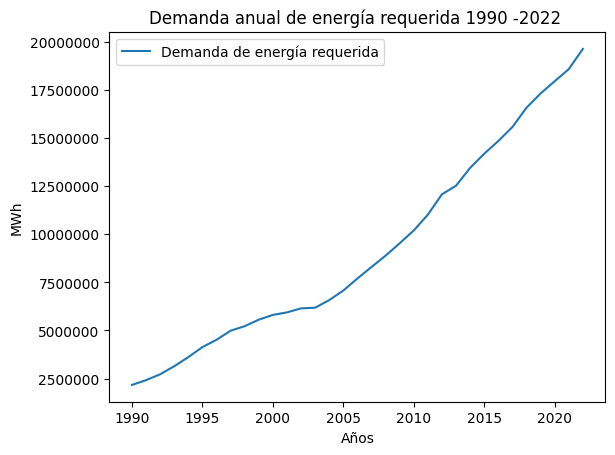

In [ ]:
# Figura 1: Serie temporal de la energía requierida anual (MWh)#
ax = df_1['Energía'].plot(legend=False)
ax.legend(['Demanda de energía requerida'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Demanda anual de energía requerida 1990 -2022 ')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

In [ ]:
data.describe()

count    3.300000e+01
mean     9.229597e+06
std      5.267944e+06
min      2.168811e+06
25%      5.221021e+06
50%      7.701304e+06
75%      1.345030e+07
max      1.963461e+07
Name: Energía, dtype: float64

# ***2. Descomposición multiplicativa de la serie temporal original***

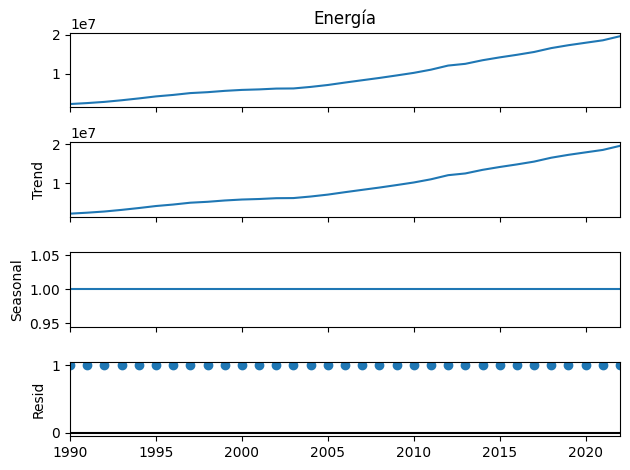

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_multiplicative = seasonal_decompose(data, model='multiplicative', period=1)
s_dec_multiplicative.plot()
plt.show()

Obs: Se puede observar que hay tendencia y es creciente la serie en el transcurso del tiempo. Asimismo, se puede observar que NO hay un componente estacional en la serie temporal a largo plazo.

# **3. Prueba de Dick-Fuller (Prueba si la serie es estacionaria o no)**

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: 0.591978
p-valor: 0.987416
Valores Críticos:
	1%: -3.770
	5%: -3.005
	10%: -2.643


Observación: Los resultados de la prueba Dickey-Fuller indican que la serie es NO estacionaría.

# ***3.Pruebas de ACF y PACF (antes del ajuste)***

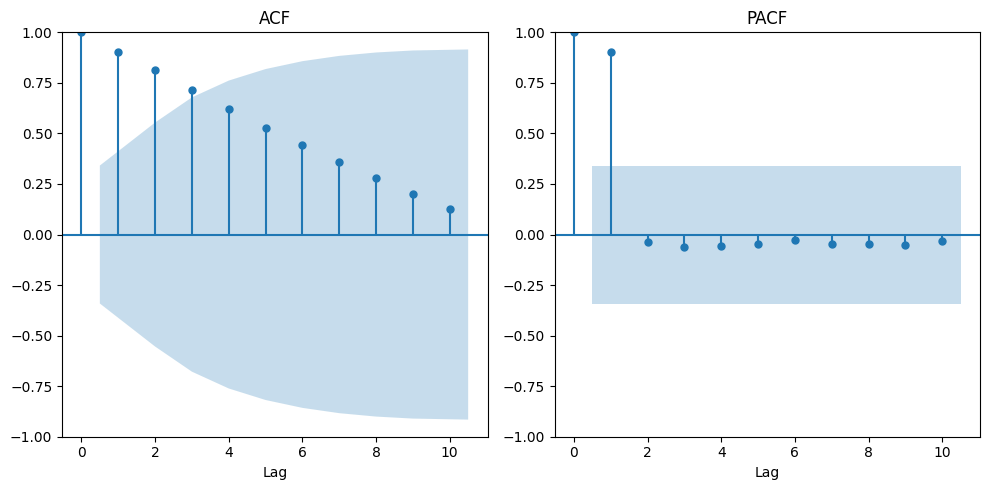

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(data, lags=10, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(data, lags=10, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
import numpy as np
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(data)
# Suma de coeficientes ACF significativos
acf_sum_1 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(data))])
# Número de coeficientes ACF significativos
num_signif_1 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(data))])
# Promedio ACF primeros 10 lags
acf_mean10_1 = np.mean(np.abs(acf_values[:10]))
print('Métricas ACF:')
print('Suma:', acf_sum_1)
print('Num Significativos:', num_signif_1)
print('Promedio 10 lags:', acf_mean10_1)

Métricas ACF:
Suma: 5.385611632059219
Num Significativos: 8
Promedio 10 lags: 0.5862883404259996


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(data)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_1 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(data))])
# Número de coeficientes significativos
num_signif_1 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(data))])
# Promedio PACF primeros 40 lags
pacf_mean10_1 = np.mean(np.abs(pacf_values[:10]))
print('Métricas PACF:')
print('Suma:', pacf_sum_1)
print('Número significativos:', num_signif_1)
print('Promedio 10 lags:', pacf_mean10_1)

Métricas PACF:
Suma: 1.9326686632820098
Número significativos: 2
Promedio 10 lags: 0.25104896327133835


# **4. Modelo AR (1)**

In [ ]:
#Importamos está librería para no imprimr mensajes#
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Herramientas de análisis
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
modelo_AR1= AutoReg(data, 1, old_names=False)

In [ ]:
resultadoAR1= modelo_AR1.fit()

In [ ]:
# Obtener predicciones en conjunto de entrenamiento
y_pred_1= resultadoAR1.predict(start=0, end=len(data), dynamic=False)

In [ ]:
print(y_pred_1)

1990             NaN
1991    2.462573e+06
1992    2.719017e+06
1993    3.035488e+06
1994    3.469213e+06
1995    3.960851e+06
1996    4.500958e+06
1997    4.896595e+06
1998    5.387366e+06
1999    5.628995e+06
2000    5.981389e+06
2001    6.237897e+06
2002    6.373424e+06
2003    6.592030e+06
2004    6.626575e+06
2005    7.038487e+06
2006    7.550910e+06
2007    8.202089e+06
2008    8.821898e+06
2009    9.433594e+06
2010    1.010037e+07
2011    1.079180e+07
2012    1.164483e+07
2013    1.274147e+07
2014    1.320534e+07
2015    1.416621e+07
2016    1.493007e+07
2017    1.561631e+07
2018    1.637054e+07
2019    1.741034e+07
2020    1.817987e+07
2021    1.884007e+07
2022    1.949131e+07
2023    2.058194e+07
Freq: A-DEC, dtype: float64


In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(y_pred_1, start=1990):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Año', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_AR(1).xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_AR(1).xlsx")

Valores de Energía predichos:
1990: nan
1991: 2462572.54
1992: 2719016.54
1993: 3035487.73
1994: 3469212.81
1995: 3960850.84
1996: 4500958.38
1997: 4896595.32
1998: 5387365.91
1999: 5628995.22
2000: 5981388.90
2001: 6237897.46
2002: 6373424.30
2003: 6592029.75
2004: 6626575.15
2005: 7038487.30
2006: 7550909.68
2007: 8202089.46
2008: 8821898.44
2009: 9433593.60
2010: 10100366.43
2011: 10791796.64
2012: 11644828.57
2013: 12741470.99
2014: 13205338.35
2015: 14166212.92
2016: 14930072.76
2017: 15616306.91
2018: 16370544.46
2019: 17410341.06
2020: 18179869.13
2021: 18840070.95
2022: 19491307.68
2023: 20581938.78


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_2 = pd.read_excel("/content/Tabla_AR(1).xlsx", parse_dates=['Energía'], index_col='Años')
df_2['Energía'] = df_2['Energía'].astype(float)

In [ ]:
data_2= df_2['Energía']

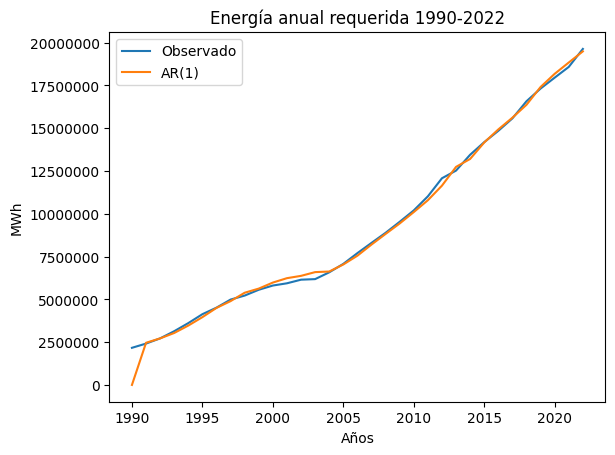

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_1 = pd.concat([data, data_2], axis=1)
#GRÁFICO
ax = concatenated_df_1.plot(legend=False)
ax.legend(['Observado', 'AR(1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía anual requerida 1990-2022')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

**4.1 Resumen estadistico del modelo AR (1)**

In [ ]:
print(resultadoAR1.summary())

                            AutoReg Model Results                             
Dep. Variable:                Energía   No. Observations:                   33
Model:                     AutoReg(1)   Log Likelihood                -432.730
Method:               Conditional MLE   S.D. of innovations         180569.328
Date:                Thu, 30 Nov 2023   AIC                            871.460
Time:                        21:27:58   BIC                            875.857
Sample:                             1   HQIC                           872.917
                                   33                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.126e+05   6.59e+04      3.224      0.001    8.34e+04    3.42e+05
Energía.L1     1.0374      0.006    160.085      0.000       1.025       1.050
                                    Roots           

In [ ]:
print('Coefficients:\n', resultadoAR1.params)
print('P-values:', resultadoAR1.pvalues)
print('AIC:', resultadoAR1.aic)
print('BIC:', resultadoAR1.bic)
print('Log Likelihood:', resultadoAR1.llf)

Coefficients:
 const         212606.020533
Energía.L1         1.037420
dtype: float64
P-values: const         0.001264
Energía.L1    0.000000
dtype: float64
AIC: 871.45975060734
BIC: 875.8569583157391
Log Likelihood: -432.72987530367


**4.2 Métricas de errores AR (1)**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo de RMSE
rmse_1 = np.sqrt(mean_squared_error(data, data_2))
# Cálculo de MAE
mae_1 = mean_absolute_error(data , data_2)
test_array_1 = data.to_numpy().flatten()
y_pred_3_array_1 = data_2.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_1 = np.mean(np.abs((test_array_1 - y_pred_3_array_1) / test_array_1)) * 100
# Cálculo del R^2
r2_1 = r2_score(data, data_2)
print(f'RMSE: {rmse_1:.2f}')
print(f'MAE: {mae_1:.2f}')
print(f'MAPE: {mape_1:.2f}%')
print(f'R^2: {r2_1:.3f}')

RMSE: 417318.58
MAE: 207969.92
MAPE: 4.87%
R^2: 0.994


**4.3 Gráficos del ACF y PACF del modelo AR (1)**

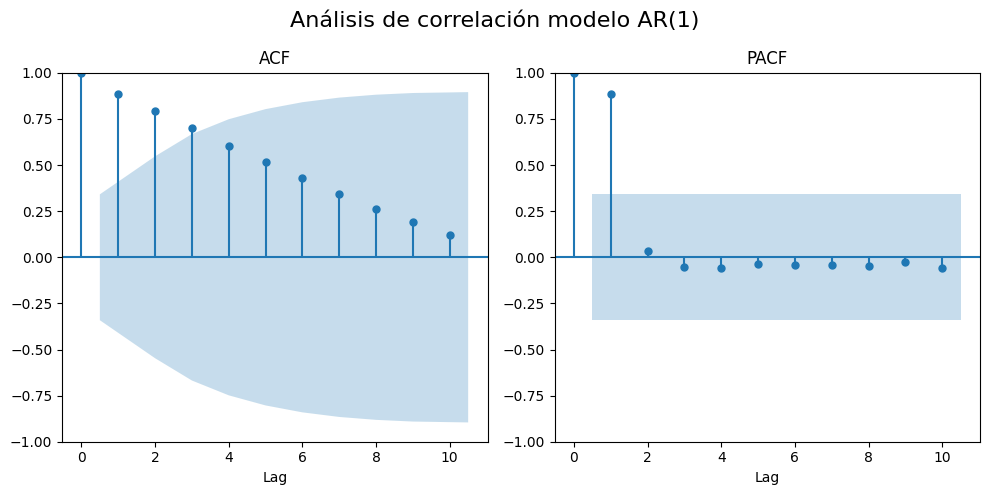

In [ ]:
# Graficar ACF y PACF modelo AR (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(data_2, lags=10, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(data_2, lags=10, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo AR(1)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(data_2)
# Suma de coeficientes ACF significativos
acf_sum_2 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(data_2))])
# Número de coeficientes ACF significativos
num_signif_2 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(data_2))])
# Promedio ACF primeros 10 lags
acf_mean40_2 = np.mean(np.abs(acf_values[:10]))
print('Métricas ACF:')
print('Suma:', acf_sum_2)
print('Num Significativos:', num_signif_2)
print('Promedio 10:', acf_mean40_2)

Métricas ACF:
Suma: 5.270935063506327
Num Significativos: 8
Promedio 10: 0.5726143653489097


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(data_2)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_2 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(data_2))])
# Número de coeficientes significativos
num_signif_2 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(data_2))])
# Promedio PACF primeros 10 lags
pacf_mean40_2 = np.mean(np.abs(pacf_values[:10]))
print('Métricas PACF:')
print('Suma:', pacf_sum_2)
print('Número significativos:', num_signif_2)
print('Promedio 10 lags:', pacf_mean40_2)

Métricas PACF:
Suma: 1.91491653575777
Número significativos: 2
Promedio 10 lags: 0.2428486493236932


**4.4 Análisis de residuos**

In [ ]:
residuo_1 = resultadoAR1.resid

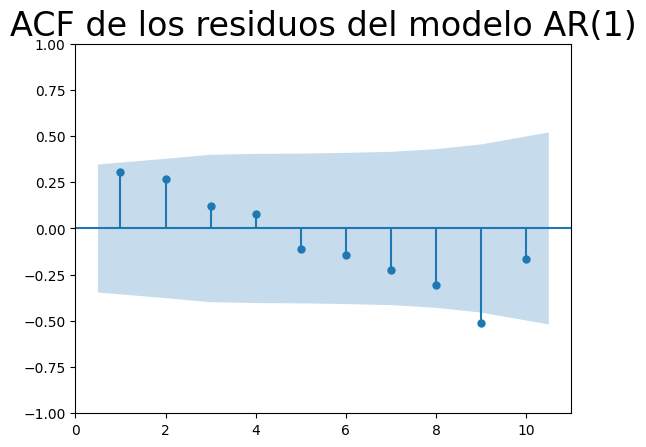

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_1, zero = False, lags = 10)
plt.title("ACF de los residuos del modelo AR(1)", size=24)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_1)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -1.425768
p-valor: 0.569862
Valores Críticos:
	1%: -3.770
	5%: -3.005
	10%: -2.643


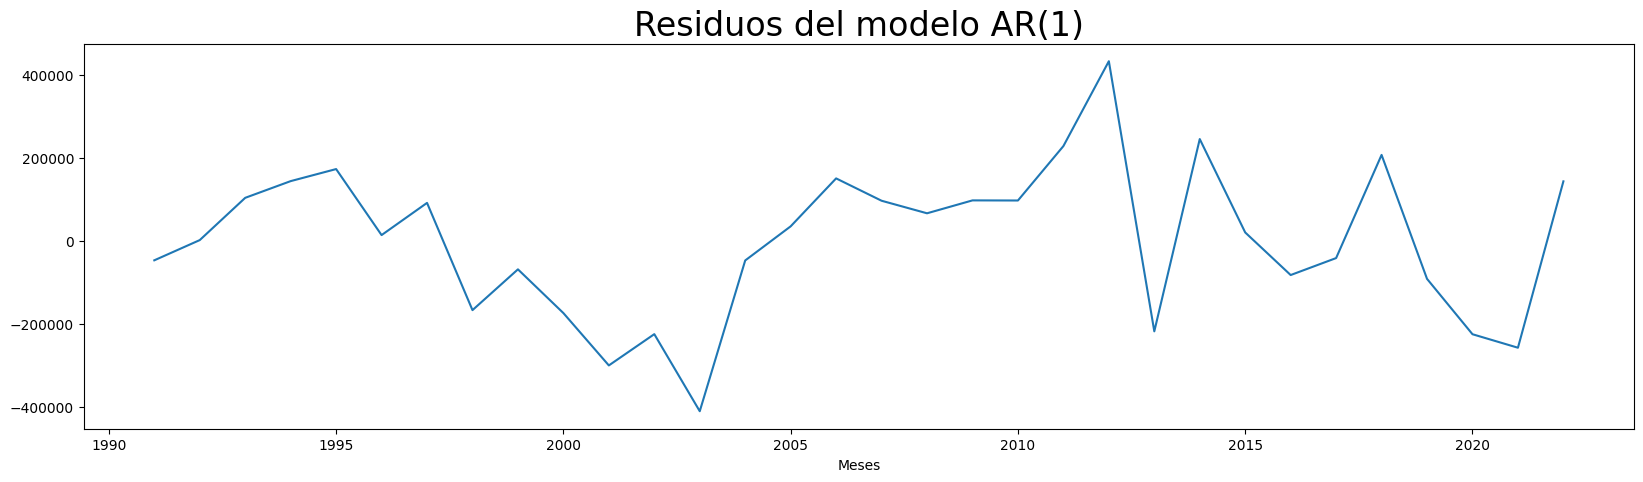

In [ ]:
residuo_1.plot(figsize=(20,5))
plt.title("Residuos del modelo AR(1)",size=24)
plt.xlabel("Meses")
plt.show()

# **5. Modelo MA (1)**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
model_ma1 = ARIMA(data, order=(0,0,1))
model_fit_ma1 = model_ma1.fit()

In [ ]:
y_pred_2= model_fit_ma1.predict(start=0, end=len(data), dynamic=False)

In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(y_pred_2, start=1990):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Años', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_MA(1).xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_MA(1).xlsx")

Valores de Energía predichos:
1990: 9229596.57
1991: 5715235.36
1992: 7046690.98
1993: 6019440.44
1994: 6956272.95
1995: 6488925.62
1996: 7249319.28
1997: 6889268.02
1998: 7581004.11
1999: 7163012.82
2000: 7815935.34
2001: 7447673.55
2002: 7884251.11
2003: 7677251.54
2004: 7888354.75
2005: 8052461.51
2006: 8347465.96
2007: 8646382.18
2008: 8915441.39
2009: 9205122.78
2010: 9524747.03
2011: 9839220.40
2012: 10299896.18
2013: 10841313.92
2014: 10756386.68
2015: 11674571.59
2016: 11510091.47
2017: 12260568.13
2018: 12239809.62
2019: 13169494.43
2020: 12999261.56
2021: 13732457.54
2022: 13637015.10
2023: 14679286.81


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_3 = pd.read_excel("/content/Tabla_MA(1).xlsx", parse_dates=['Energía'], index_col='Años')
df_3['Energía'] = df_3['Energía'].astype(float)

In [ ]:
data_3= df_3['Energía']

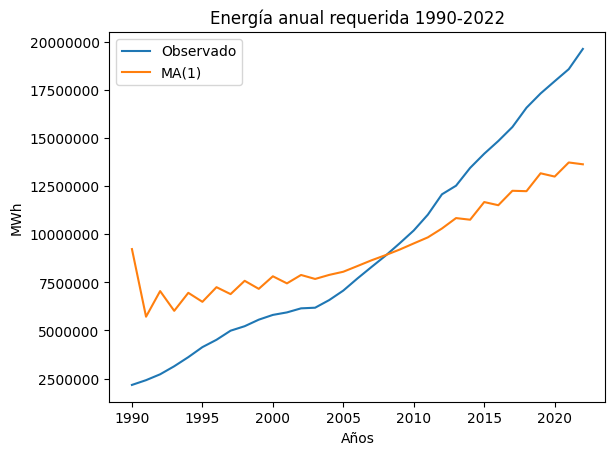

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_2 = pd.concat([data, data_3], axis=1)
#GRÁFICO
ax = concatenated_df_2.plot(legend=False)
ax.legend(['Observado', 'MA(1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía anual requerida 1990-2022')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

**5.1 Resumen estadistico del modelo MA (1)**

In [ ]:
model_fit_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Energía   No. Observations:                   33
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -545.361
Date:                Thu, 30 Nov 2023   AIC                           1096.723
Time:                        21:43:17   BIC                           1101.212
Sample:                             0   HQIC                          1098.233
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.23e+06   4.06e+06      2.274      0.023    1.27e+06    1.72e+07
ma.L1          0.9089      1.170      0.777      0.437      -1.385       3.203
sigma2      2.444e+13      0.155   1.58e+14      0.000    2.44e+13    2.44e+13
===================================================================================
Ljung-Box (L1) (Q):                  26.06   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.00   Prob(JB):                         0.40
Heteroskedasticity (H):               1.70   Skew:                             0.38
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.37e+30. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:\n', model_fit_ma1.params)
print('P-values:', model_fit_ma1.pvalues)
print('AIC:', model_fit_ma1.aic)
print('BIC:', model_fit_ma1.bic)
print('Log Likelihood:', model_fit_ma1.llf)

Coefficients:
 const     9.229597e+06
ma.L1     9.089354e-01
sigma2    2.444233e+13
dtype: float64
P-values: const     0.022980
ma.L1     0.437335
sigma2    0.000000
dtype: float64
AIC: 1096.722545832471
BIC: 1101.2120685168704
Log Likelihood: -545.3612729162355


**5.2 Métricas de errores MA(1)**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo de RMSE
rmse_3 = np.sqrt(mean_squared_error(data, data_3))
# Cálculo de MAE
mae_3 = mean_absolute_error(data , data_3)
test_array_3 = data.to_numpy().flatten()
y_pred_3_array_3 = data_3.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_3 = np.mean(np.abs((test_array_3 - y_pred_3_array_3) / test_array_3)) * 100
# Cálculo del R^2
r2_3 = r2_score(data, data_3)
print(f'RMSE: {rmse_3:.2f}')
print(f'MAE: {mae_3:.2f}')
print(f'MAPE: {mape_3:.2f}%')
print(f'R^2: {r2_3:.3f}')

RMSE: 3026160.71
MAE: 2536577.11
MAPE: 44.21%
R^2: 0.660


**5.3 Gráficos del ACF y PACF del modelo MA (1)**

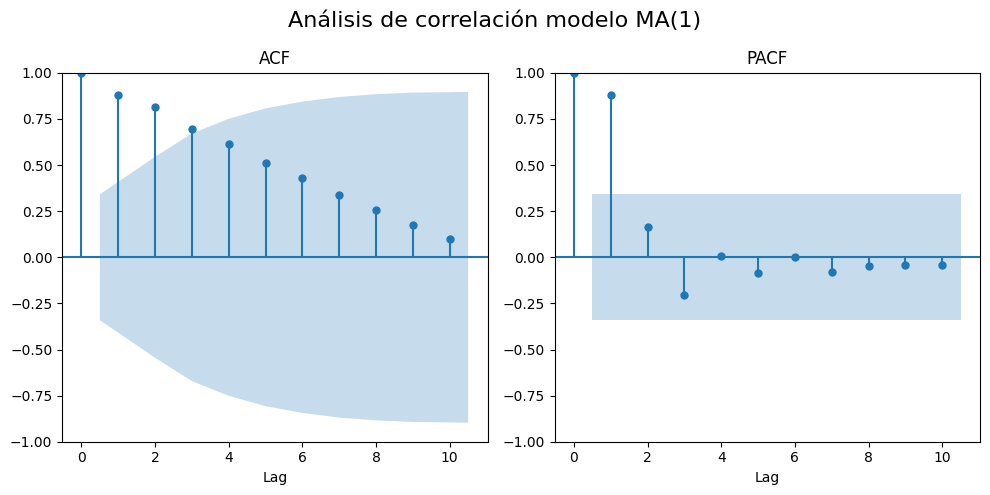

In [ ]:
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(data_3, lags=10, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(data_3, lags=10, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo MA(1)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(data_3)
# Suma de coeficientes ACF significativos
acf_sum_3 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(data_3))])
# Número de coeficientes ACF significativos
num_signif_3 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(data_3))])
# Promedio ACF primeros 10 lags
acf_mean10_3 = np.mean(np.abs(acf_values[:10]))
print('Métricas ACF:')
print('Suma:', acf_sum_3)
print('Num Significativos:', num_signif_3)
print('Promedio 10:', acf_mean10_3)

Métricas ACF:
Suma: 4.945729192012283
Num Significativos: 7
Promedio 10: 0.571087517796044


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(data_3)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_3 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(data_3))])
# Número de coeficientes significativos
num_signif_3 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(data_3))])
# Promedio PACF primeros 10 lags
pacf_mean10_3 = np.mean(np.abs(pacf_values[:10]))
print('Métricas PACF:')
print('Suma:', pacf_sum_3)
print('Número significativos:', num_signif_3)
print('Promedio 10 lags:', pacf_mean10_3)

Métricas PACF:
Suma: 1.908522012048702
Número significativos: 2
Promedio 10 lags: 0.2822252716941232


**5.4 Análisis de residuos**

In [ ]:
residuo_3 = model_fit_ma1.resid

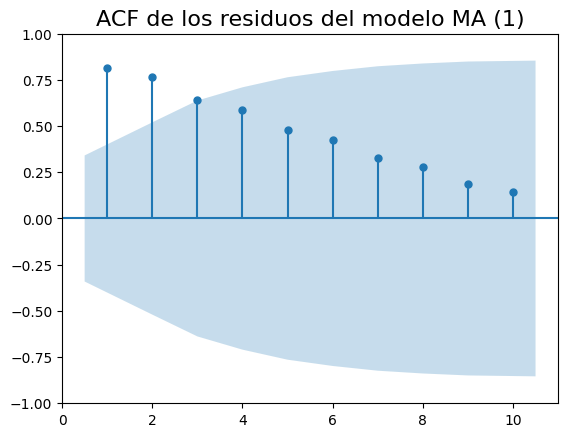

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_3, zero = False, lags = 10)
plt.title("ACF de los residuos del modelo MA (1)", size=16)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_3)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: 1.216605
p-valor: 0.996099
Valores Críticos:
	1%: -3.661
	5%: -2.961
	10%: -2.619


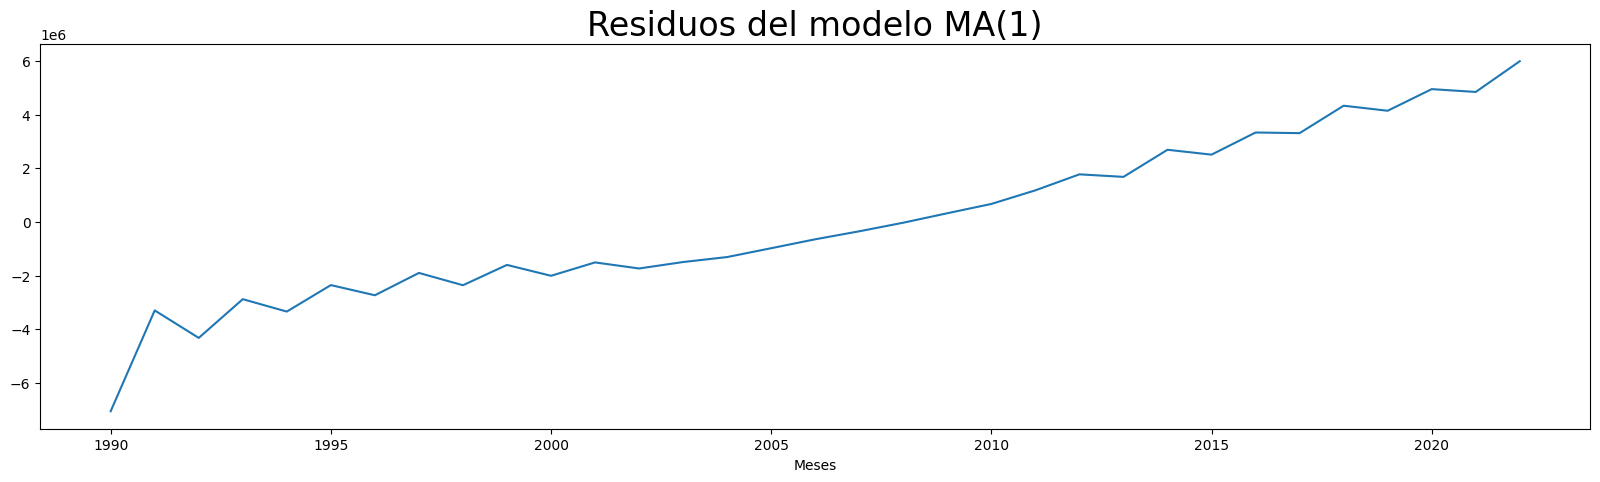

In [ ]:
residuo_3.plot(figsize=(20,5))
plt.title("Residuos del modelo MA(1)",size=24)
plt.xlabel("Meses")
plt.show()

# **6. Modelo ARMA (1,1)**

In [ ]:
model_arma11 = ARIMA(data, order=(1,0,1))
model_fit_arma11 = model_arma11.fit()

In [ ]:
y_pred_3= model_fit_arma11.predict(start=0, end=len(data)-1, dynamic=False)

In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(y_pred_3, start=1990):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Años', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_ARMA(1,1).xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_ARMA(1,1).xlsx")

Valores de Energía predichos:
1990: 9229596.57
1991: 2189691.69
1992: 2559385.32
1993: 2852989.10
1994: 3355035.86
1995: 3813365.82
1996: 4374332.39
1997: 4635350.77
1998: 5247199.88
1999: 5226364.10
2000: 5804617.37
2001: 5829651.81
2002: 6030019.91
2003: 6246453.49
2004: 6157346.85
2005: 6876594.27
2006: 7217359.91
2007: 8032970.05
2008: 8481431.02
2009: 9161922.98
2010: 9775783.25
2011: 10473607.13
2012: 11374241.71
2013: 12529728.83
2014: 12501582.58
2015: 14059451.74
2016: 14243278.42
2017: 15219774.85
2018: 15776184.92
2019: 17070347.18
2020: 17439245.41
2021: 18250531.59
2022: 18752217.49


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_4 = pd.read_excel("/content/Tabla_ARMA(1,1).xlsx", parse_dates=['Energía'], index_col='Años')
df_4['Energía'] = df_4['Energía'].astype(float)

In [ ]:
dato_4= df_4['Energía']

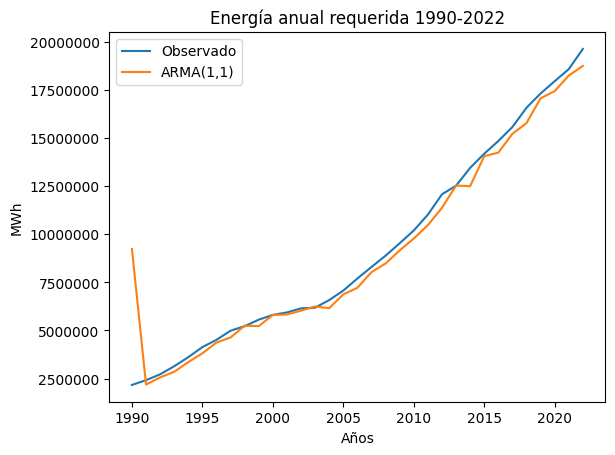

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_4 = pd.concat([data, dato_4], axis=1)
#GRÁFICO
ax = concatenated_df_4.plot(legend=False)
ax.legend(['Observado', 'ARMA(1,1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía anual requerida 1990-2022')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

**6.1 Resumen estadistico del modelo ARMA (1,1)**

In [ ]:
model_fit_arma11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Energía   No. Observations:                   33
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -480.045
Date:                Thu, 30 Nov 2023   AIC                            968.091
Time:                        22:17:22   BIC                            974.077
Sample:                             0   HQIC                           970.105
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.23e+06   9.99e-10   9.24e+15      0.000    9.23e+06    9.23e+06
ar.L1          0.9943      0.024     41.684      0.000       0.948       1.041
ma.L1          0.6674      0.354      1.888      0.059      -0.026       1.360
sigma2       3.38e+11   3.07e-13    1.1e+24      0.000    3.38e+11    3.38e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.66   Prob(JB):                         0.73
Heteroskedasticity (H):               4.93   Skew:                             0.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.14e+39. Standard errors may be unstable.
"""

**6.2 Métricas de errores ARMA(1,1)**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo de RMSE
rmse_4 = np.sqrt(mean_squared_error(data, dato_4))
# Cálculo de MAE
mae_4 = mean_absolute_error(data , dato_4)
test_array_4 = data.to_numpy().flatten()
y_pred_3_array_4 = dato_4.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_4 = np.mean(np.abs((test_array_4 - y_pred_3_array_4) / test_array_4)) * 100
# Cálculo del R^2
r2_4 = r2_score(data, dato_4)
print(f'RMSE: {rmse_4:.2f}')
print(f'MAE: {mae_4:.2f}')
print(f'MAPE: {mape_4:.2f}%')
print(f'R^2: {r2_4:.3f}')

RMSE: 1297226.14
MAE: 548542.97
MAPE: 13.89%
R^2: 0.937


**6.3 Gráficos del ACF y PACF del modelo ARMA (1,1)**

---



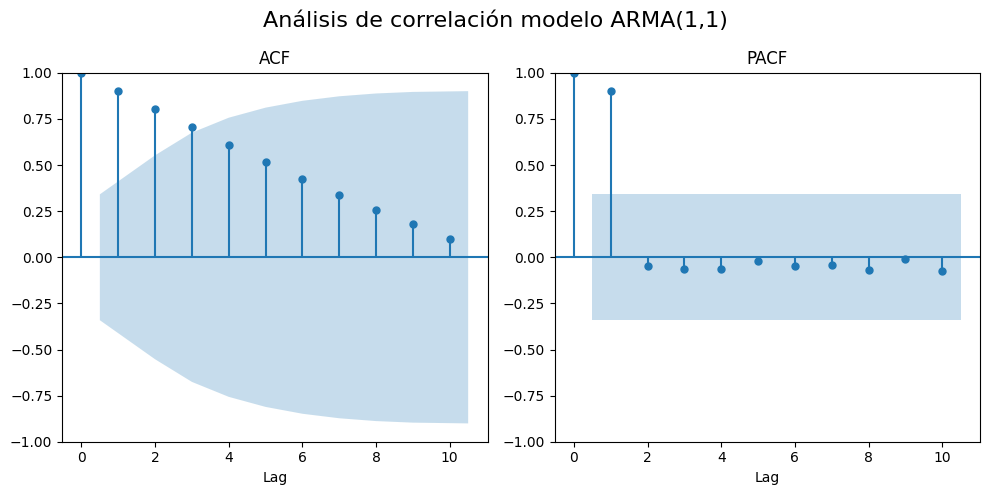

In [ ]:
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(dato_4, lags=10, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(dato_4, lags=10, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo ARMA(1,1)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(dato_4)
# Suma de coeficientes ACF significativos
acf_sum_4 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(dato_4))])
# Número de coeficientes ACF significativos
num_signif_4 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(dato_4))])
# Promedio ACF primeros 10 lags
acf_mean10_4 = np.mean(np.abs(acf_values[:10]))
print('Métricas ACF:')
print('Suma:', acf_sum_4)
print('Num Significativos:', num_signif_4)
print('Promedio 10:', acf_mean10_4)

Métricas ACF:
Suma: 4.958219273951722
Num Significativos: 7
Promedio 10: 0.5731969509267854


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(dato_4)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_4 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(dato_4))])
# Número de coeficientes significativos
num_signif_4 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(dato_4))])
# Promedio PACF primeros 10 lags
pacf_mean10_4 = np.mean(np.abs(pacf_values[:10]))
print('Métricas PACF:')
print('Suma:', pacf_sum_4)
print('Número significativos:', num_signif_4)
print('Promedio 10 lags:', pacf_mean10_4)

Métricas PACF:
Suma: 1.9301495570403122
Número significativos: 2
Promedio 10 lags: 0.24792033163740132


**6.4 Análisis de residuos**

In [ ]:
residuo_5 = model_fit_arma11.resid

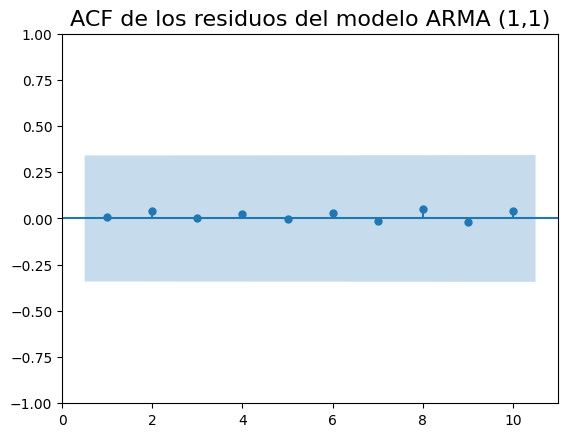

In [ ]:
sgt.plot_acf(residuo_5, zero = False, lags = 10)
plt.title("ACF de los residuos del modelo ARMA (1,1)", size=16)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_5)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -1.591878
p-valor: 0.487672
Valores Críticos:
	1%: -3.770
	5%: -3.005
	10%: -2.643


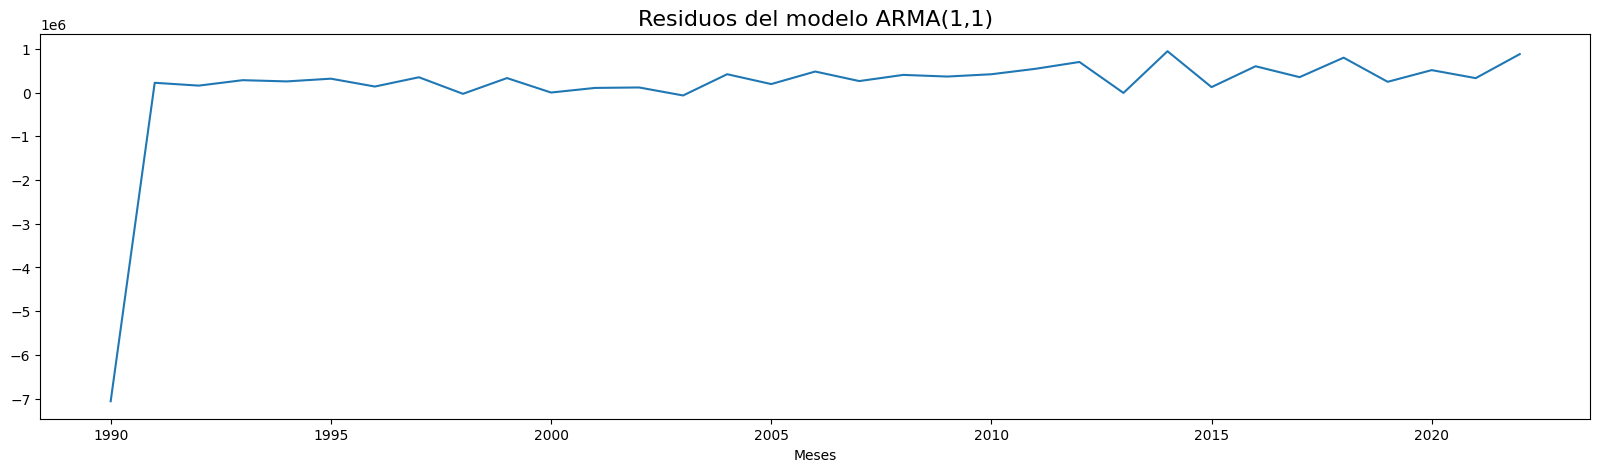

In [ ]:
residuo_5.plot(figsize=(20,5))
plt.title("Residuos del modelo ARMA(1,1)",size=16)
plt.xlabel("Meses")
plt.show()

# ***Analizamos con el AUTO ARIMA***

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
# Auto ARIMA
import pandas as pd
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
auto_arima_model = auto_arima(data, trace=True, suppress_warnings=True, m=1)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=850.214, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=850.650, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=850.502, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=848.626, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=848.339, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=849.902, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=850.313, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=848.352, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=849.916, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=852.542, Time=0.04 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.697 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -4

In [ ]:
predictions = auto_arima_model.predict(n_periods=28)
print(predictions)

# **7. ARIMA (1,2,1)**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
model_arima121 = ARIMA(data, order=(1,2,1))
model_fit_arima121 = model_arima121.fit()

In [ ]:
y_pred_2= model_fit_arima121.predict(start=0, end=len(data)-1, dynamic=False)

In [ ]:
print(y_pred_2)

In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(y_pred_2, start=1990):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Años', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_Ajuste_ARIMA121.xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_Ajuste_ARIMA121.xlsx")

Valores de Energía predichos:
1990: 0.00
1991: 3722962.83
1992: 2907662.49
1993: 3170378.31
1994: 3614383.46
1995: 4105527.96
1996: 4649563.78
1997: 4945773.66
1998: 5460756.94
1999: 5544649.63
2000: 5922987.81
2001: 6105975.49
2002: 6148753.33
2003: 6384970.41
2004: 6300532.51
2005: 6897635.69
2006: 7475809.95
2007: 8214476.66
2008: 8828035.48
2009: 9433574.93
2010: 10122792.48
2011: 10819583.20
2012: 11752105.53
2013: 12982387.85
2014: 13097054.40
2015: 14282358.27
2016: 14929448.95
2017: 15542489.74
2018: 16300190.50
2019: 17473960.81
2020: 18086208.36
2021: 18649484.83
2022: 19254347.67


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

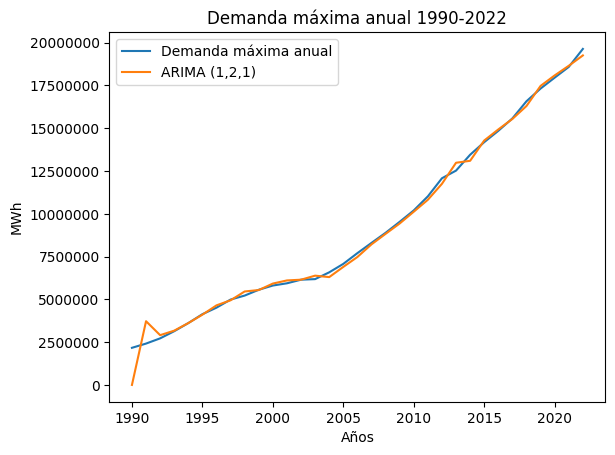

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_7 = pd.concat([data, y_pred_2], axis=1)
#GRÁFICO
ax = concatenated_df_7.plot(legend=False)
ax.legend(['Demanda máxima anual', 'ARIMA (1,2,1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Demanda máxima anual 1990-2022')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

**7.1 Resumen estadistico del modelo ARIMA (1,2,1)**

In [ ]:
model_fit_arima121.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Energía   No. Observations:                   33
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -421.170
Date:                Thu, 30 Nov 2023   AIC                            848.339
Time:                        22:39:48   BIC                            852.641
Sample:                             0   HQIC                           849.742
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3162      0.215      1.474      0.141      -0.104       0.737
ma.L1         -0.6954      0.184     -3.778      0.000      -1.056      -0.335
sigma2      3.719e+10   6.42e-13   5.79e+22      0.000    3.72e+10    3.72e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.24   Prob(JB):                         0.97
Heteroskedasticity (H):               4.01   Skew:                            -0.01
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.18e+38. Standard errors may be unstable.
"""

In [ ]:
print('\nCoefficients:\n', model_fit_arima121.params)
print('P-values:', model_fit_arima121.pvalues)
print('AIC:', model_fit_arima121.aic)
print('BIC:', model_fit_arima121.bic)
print('Log Likelihood:', model_fit_arima121.llf)


Coefficients:
 ar.L1     3.162316e-01
ma.L1    -6.954333e-01
sigma2    3.718718e+10
dtype: float64
P-values: ar.L1     0.140587
ma.L1     0.000158
sigma2    0.000000
dtype: float64
AIC: 848.3391860428515
BIC: 852.6411476563069
Log Likelihood: -421.1695930214257


**7.2 Métricas de errores ARIMA(1,2,1)**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse_5 = np.sqrt(mean_squared_error(data , y_pred_2))
# Cálculo del MAE
mae_5 = mean_absolute_error(data , y_pred_2)
test_array_5 = data.to_numpy().flatten()
y_pred_3_array_5 = y_pred_2.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_5 = np.mean(np.abs((test_array_5 - y_pred_3_array_5) / test_array_5)) * 100
# Cálculo del R2
r2_5 = r2_score(data, y_pred_2)
print(f'RMSE: {rmse_5:.2f}')
print(f'MAE: {mae_5:.2f}')
print(f'MAPE: {mape_5:.2f}%')
print(f'R^2: {r2_5:.3f}')

RMSE: 478572.31
MAE: 248306.78
MAPE: 6.38%
R^2: 0.991


**7.3 Gráficos del ACF y PACF del modelo ARIMA (1,2,1)**

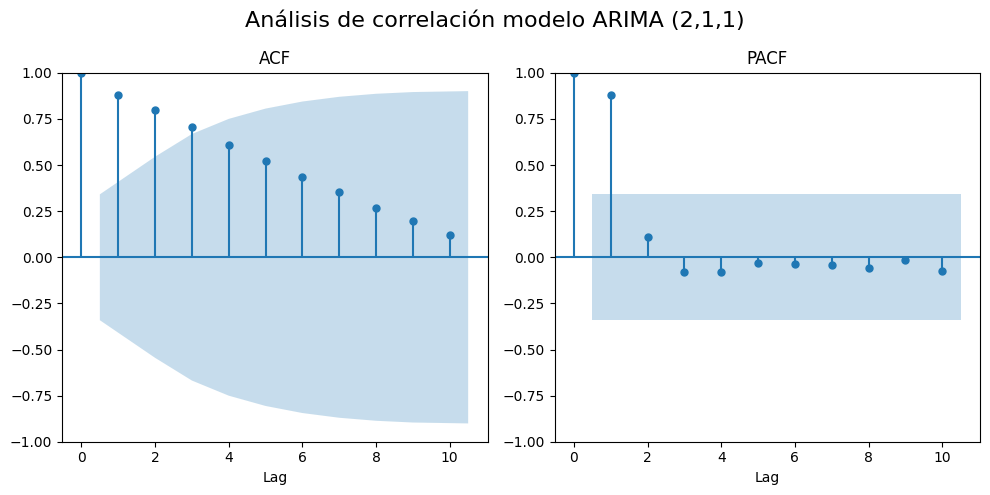

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(y_pred_2, lags=10, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(y_pred_2, lags=10, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo ARIMA (2,1,1)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(y_pred_2)
# Suma de coeficientes ACF significativos
acf_sum_5 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_2))])
# Número de coeficientes ACF significativos
num_signif_5 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_2))])
# Promedio ACF primeros 10 lags
acf_mean10_5 = np.mean(np.abs(acf_values[:10]))
print('Métricas ACF:')
print('Suma:', acf_sum_5)
print('Num Significativos:', num_signif_5)
print('Promedio 10:', acf_mean10_5)

Métricas ACF:
Suma: 5.307236329034633
Num Significativos: 8
Promedio 10: 0.5771650681941358


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(y_pred_2)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_5 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_2))])
# Número de coeficientes significativos
num_signif_5 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_2))])
# Promedio PACF primeros 10 lags
pacf_mean10_5 = np.mean(np.abs(pacf_values[:10]))
print('Métricas PACF:')
print('Suma:', pacf_sum_5)
print('Número significativos:', num_signif_5)
print('Promedio 10 lags:', pacf_mean10_5)

Métricas PACF:
Suma: 1.9090973362858639
Número significativos: 2
Promedio 10 lags: 0.2592311838228635


**7.4 Análisis de los residuos**

In [ ]:
residuo_1 = model_fit_arima121.resid

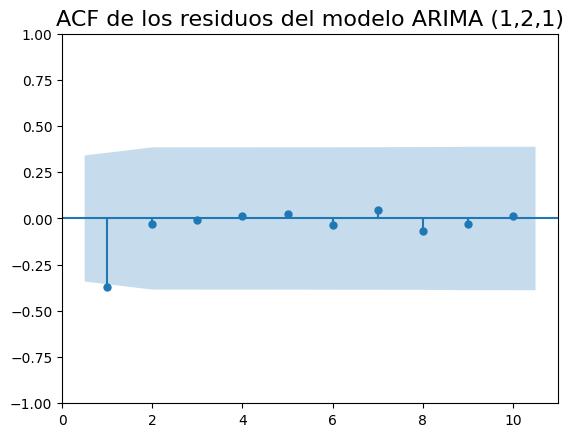

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_1, zero = False, lags = 10)
plt.title("ACF de los residuos del modelo ARIMA (1,2,1)", size=16)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_1)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -1.267298
p-valor: 0.643998
Valores Críticos:
	1%: -3.753
	5%: -2.998
	10%: -2.639


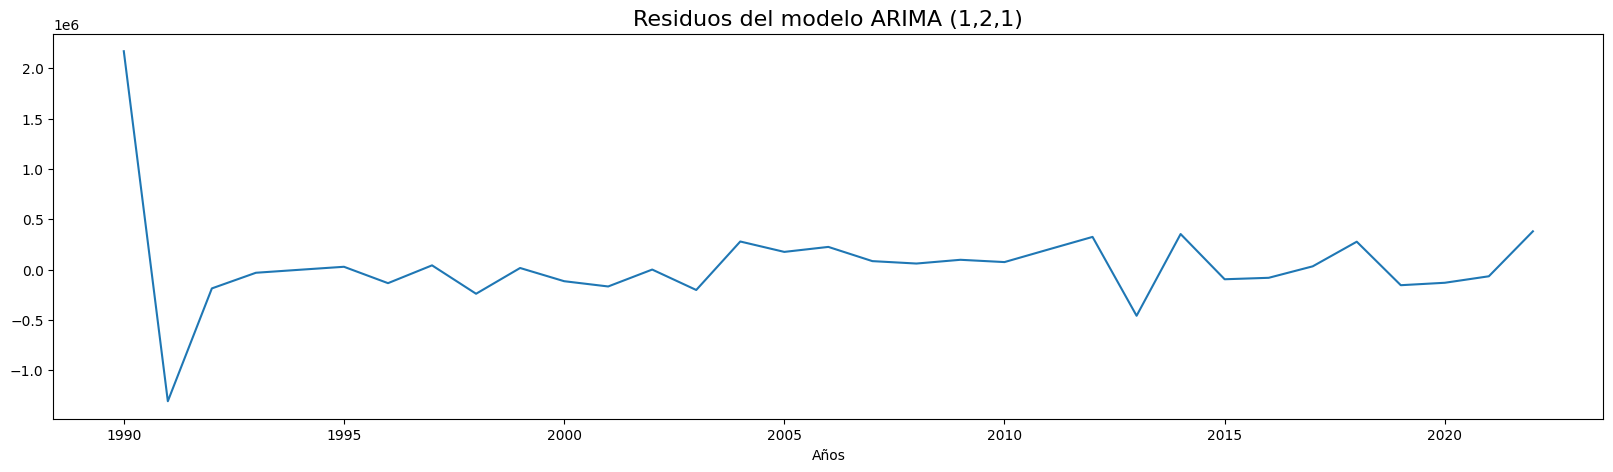

In [ ]:
residuo_1.plot(figsize=(20,5))
plt.title("Residuos del modelo ARIMA (1,2,1)",size=16)
plt.xlabel("Años")
plt.show()

In [ ]:
predictions_3 = model_fit_arima121.predict(start=33, end=60,)

In [ ]:
print(predictions_3)

33    2.055539e+07
34    2.143490e+07
35    2.230136e+07
36    2.316369e+07
37    2.402472e+07
38    2.488533e+07
39    2.574581e+07
40    2.660625e+07
41    2.746668e+07
42    2.832710e+07
43    2.918753e+07
44    3.004795e+07
45    3.090837e+07
46    3.176879e+07
47    3.262921e+07
48    3.348963e+07
49    3.435005e+07
50    3.521048e+07
51    3.607090e+07
52    3.693132e+07
53    3.779174e+07
54    3.865216e+07
55    3.951258e+07
56    4.037301e+07
57    4.123343e+07
58    4.209385e+07
59    4.295427e+07
60    4.381469e+07
Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(predictions_3, start=2023):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Años', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_Predicciones.xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_Predicciones.xlsx")

Valores de Energía predichos:
2023: 20555394.79
2024: 21434903.87
2025: 22301361.51
2026: 23163691.87
2027: 24024717.05
2028: 24885329.49
2029: 25745811.40
2030: 26606252.05
2031: 27466679.64
2032: 28327103.11
2033: 29187525.26
2034: 30047947.01
2035: 30908368.63
2036: 31768790.20
2037: 32629211.76
2038: 33489633.32
2039: 34350054.88
2040: 35210476.43
2041: 36070897.99
2042: 36931319.54
2043: 37791741.10
2044: 38652162.65
2045: 39512584.21
2046: 40373005.76
2047: 41233427.32
2048: 42093848.88
2049: 42954270.43
2050: 43814691.99


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

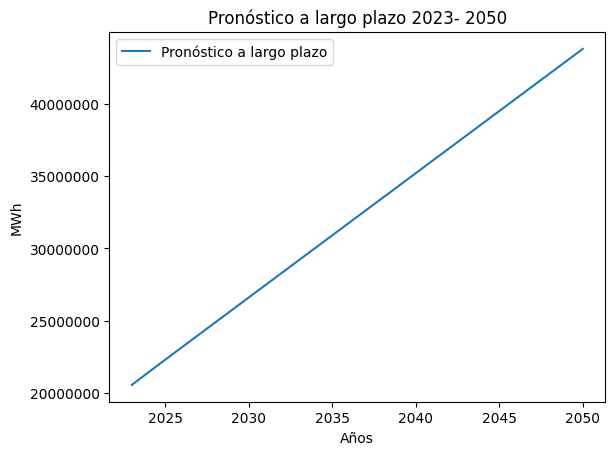

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([pron_energía ], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Pronóstico a largo plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a largo plazo 2023- 2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

In [ ]:
df_04 = pd.read_excel("/content/Tabla_Ajuste_ARIMA121.xlsx", parse_dates=['Energía'], index_col='Años')

In [ ]:
ajuste= df_04["Energía"]
ajuste_energía = ajuste.astype(float)

In [ ]:
df_03 = pd.read_excel("/content/Tabla_Predicciones.xlsx", parse_dates=['Energía'], index_col='Años')

In [ ]:
pron= df_03["Energía"]
pron_energía = pron.astype(float)

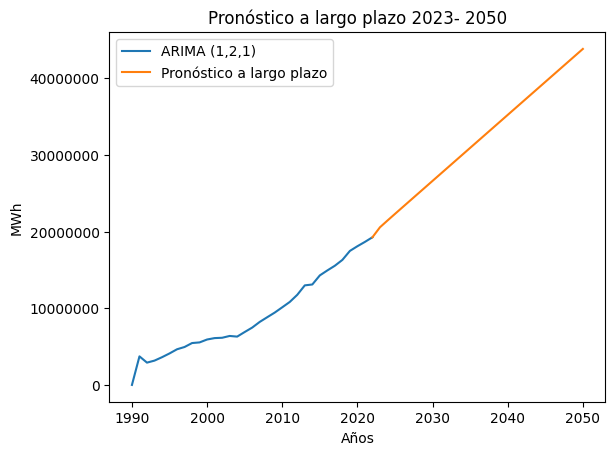

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

concatenated_df_10 = pd.concat([ajuste_energía, pron_energía], axis=1)

# Gráfico
ax = concatenated_df_10.plot(legend=False)
ax.legend(['ARIMA (1,2,1)', 'Pronóstico a largo plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a largo plazo 2023- 2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

# **SARIMA (1,2,1)(0,0,0,0) = ARIMA (1,2,1)**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 1, 2, 1  # Órdenes no estacionales
P, D, Q, s = 0, 0, 0, 0  # Órdenes estacionales
# Ajusta el modelo SARIMA
sarima_model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred_4= sarima_fit.predict(start=0, end=len(data)-1, dynamic=False)

# **8. ARIMAX**

In [ ]:
df_exog = pd.read_excel("/content/Tempertura máxima.xlsx", parse_dates=['Temperatura máxima'], index_col='Años')

In [ ]:
df_exog['Temperatura máxima'] = df_exog['Temperatura máxima'].astype(float)

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
arimax = SARIMAX(data, exog=df_exog['Temperatura máxima'], order=(1, 2, 1))

In [ ]:
arimax_fit = arimax.fit()

In [ ]:
arimax_tot = arimax_fit.predict()

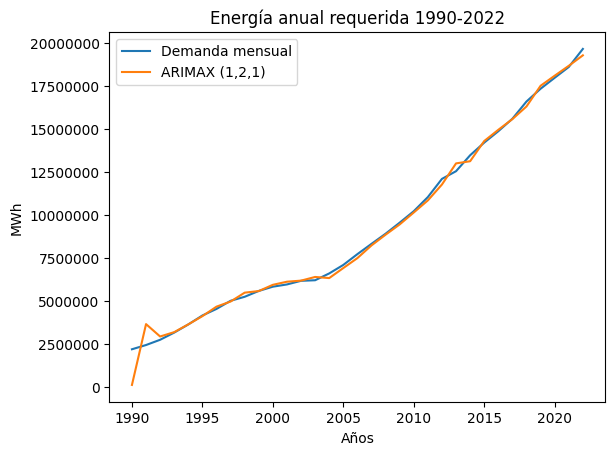

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_11 = pd.concat([data, arimax_tot], axis=1)
#GRÁFICO
ax = concatenated_df_11.plot(legend=False)
ax.legend(['Demanda mensual', 'ARIMAX (1,2,1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía anual requerida 1990-2022')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(arimax_tot, start=1990):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Años', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_ARIMAX_AJUSTE_2.xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_ARIMAX_AJUSTE_2.xlsx")

Valores de Energía predichos:
1990: 95649.76
1991: 3631710.32
1992: 2911504.17
1993: 3165628.89
1994: 3616822.65
1995: 4095421.61
1996: 4646881.15
1997: 4944811.26
1998: 5460655.42
1999: 5554376.24
2000: 5916923.27
2001: 6097539.68
2002: 6160244.05
2003: 6373997.36
2004: 6308665.35
2005: 6892186.59
2006: 7470758.57
2007: 8207631.66
2008: 8832238.28
2009: 9428662.84
2010: 10122385.14
2011: 10825617.70
2012: 11749725.07
2013: 12978038.89
2014: 13103801.73
2015: 14277823.09
2016: 14930691.25
2017: 15553271.23
2018: 16288648.01
2019: 17491493.01
2020: 18076369.85
2021: 18652441.33
2022: 19261618.80


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**8.1 Resumen estadistico del modelo ARIMAX (1,2,1)**

In [ ]:
arimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Energía   No. Observations:                   33
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -421.007
Date:                Fri, 01 Dec 2023   AIC                            850.014
Time:                        01:31:44   BIC                            855.750
Sample:                             0   HQIC                           851.884
                                 - 33                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Temperatura máxima  2310.9389   1.26e+04      0.184      0.854   -2.24e+04     2.7e+04
ar.L1                  0.2884      0.232      1.243      0.214      -0.166       0.743
ma.L1                 -0.6825      0.197     -3.472      0.001      -1.068      -0.297
sigma2              3.691e+10      0.002   1.85e+13      0.000    3.69e+10    3.69e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.25   Prob(JB):                         0.96
Heteroskedasticity (H):               4.06   Skew:                            -0.01
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.44e+32. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:\n', arimax_fit.params)
print('P-values:', arimax_fit.pvalues)
print('AIC:', arimax_fit.aic)
print('BIC:', arimax_fit.bic)
print('Log Likelihood:', arimax_fit.llf)

Coefficients:
 Temperatura máxima    2.310939e+03
ar.L1                 2.884477e-01
ma.L1                -6.824998e-01
sigma2                3.690681e+10
dtype: float64
P-values: Temperatura máxima    0.854304
ar.L1                 0.213917
ma.L1                 0.000516
sigma2                0.000000
dtype: float64
AIC: 850.0140398857104
BIC: 855.749988703651
Log Likelihood: -421.0070199428552


**8.2 Métricas de errores ARIMAX (1,2,1)**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse_11 = np.sqrt(mean_squared_error(data, arimax_tot))
# Cálculo del MAE
mae_11 = mean_absolute_error(data ,arimax_tot)
test_array = data.to_numpy().flatten()
y_pred_11_array = arimax_tot.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_11 = np.mean(np.abs((test_array - y_pred_11_array) / test_array)) * 100
# Cálculo del R^2
r2_11 = r2_score(data, arimax_tot)
print(f'RMSE: {rmse_11:.2f}')
print(f'MAE: {mae_11:.2f}')
print(f'MAPE: {mape_11:.2f}%')
print(f'R^2: {r2_11:.3f}')

RMSE: 457603.80
MAE: 242079.49
MAPE: 6.12%
R^2: 0.992


**8.3 Gráficos del ACF y PACF del modelo ARIMAX (1,2,1)**

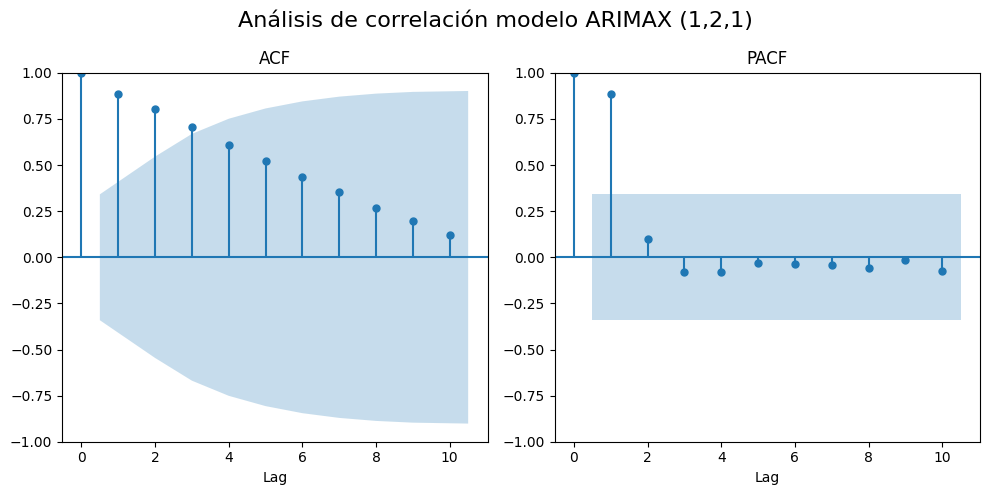

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo ARIMAX (1,2,1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(arimax_tot, lags=10, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(arimax_tot, lags=10, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo ARIMAX (1,2,1)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
import numpy as np
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(arimax_tot)
# Suma de coeficientes ACF significativos
acf_sum_8 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(arimax_tot))])
# Número de coeficientes ACF significativos
num_signif_8 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(arimax_tot))])
# Promedio ACF primeros 10 lags
acf_mean40_8 = np.mean(np.abs(acf_values[:10]))
print('Métricas ACF:')
print('Suma:', acf_sum_8)
print('Num Significativos:', num_signif_8)
print('Promedio 40:', acf_mean40_8)

Métricas ACF:
Suma: 5.311380879690035
Num Significativos: 8
Promedio 40: 0.5775954106524057


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(arimax_tot )
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_8 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(arimax_tot))])
# Número de coeficientes significativos
num_signif_8 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(arimax_tot))])
# Promedio PACF primeros 10 lags
pacf_mean40_8= np.mean(np.abs(pacf_values[:10]))
print('Métricas PACF:')
print('Suma:', pacf_sum_8)
print('Número significativos:', num_signif_8)
print('Promedio 10 lags:', pacf_mean40_8)

Métricas PACF:
Suma: 1.9108546518403502
Número significativos: 2
Promedio 10 lags: 0.2579018887329375


**8.4 Análisis de residuos del modelo ARIMAX (1,2,1)**

In [ ]:
residuo_8 = arimax_fit.resid

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_8)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -1.319198
p-valor: 0.620344
Valores Críticos:
	1%: -3.753
	5%: -2.998
	10%: -2.639


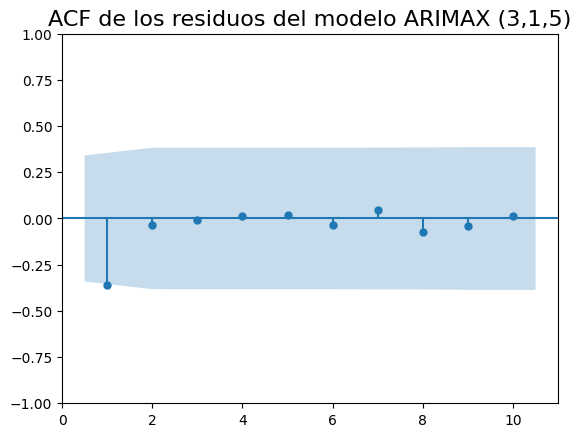

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_8, zero = False, lags = 10)
plt.title("ACF de los residuos del modelo ARIMAX (3,1,5)", size=16)
plt.show()

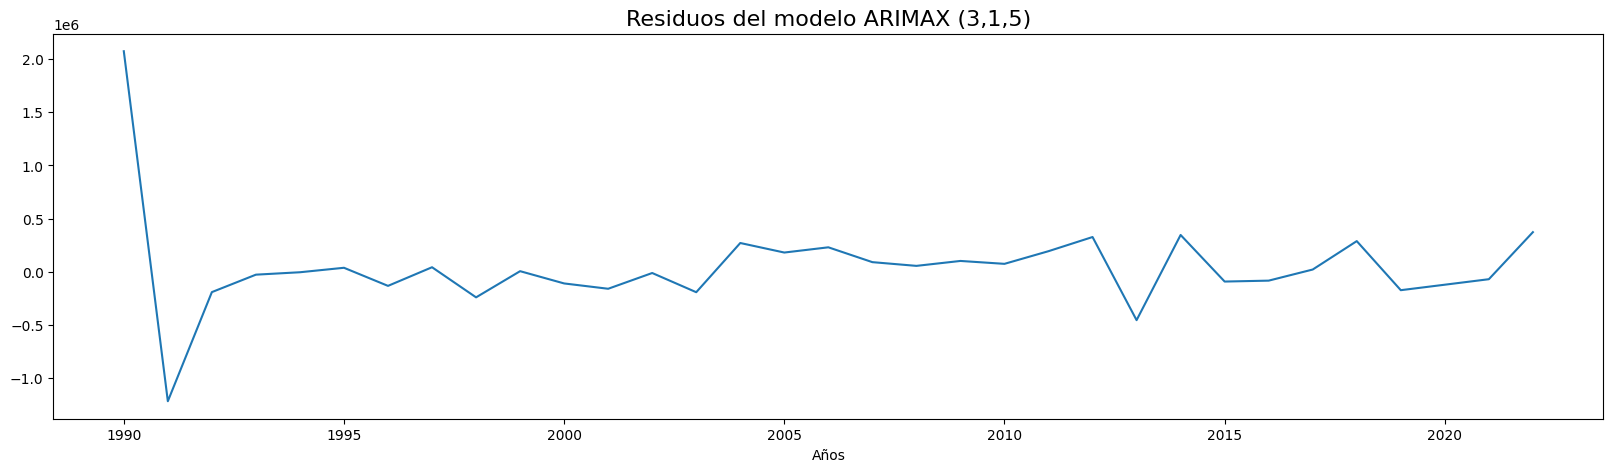

In [ ]:
residuo_8.plot(figsize=(20,5))
plt.title("Residuos del modelo ARIMAX (3,1,5)",size=16)
plt.xlabel("Años")
plt.show()

**8.5 Previsión de la Energía requerida mensual (2023 -2050) Modelo ARIMAX (1,2,1)**

In [ ]:
df_pron = pd.read_excel("/content/Temperatura máxima 2023_2050 - copia.xlsx", parse_dates=['Temperatura'], index_col='Años')

In [ ]:
temp_series = df_pron["Temperatura"]
temp_series = temp_series.astype(float)

In [ ]:
print(temp_series)

Años
33    41.0
34    41.0
35    42.0
36    42.0
37    44.0
38    41.0
39    44.0
40    44.0
41    42.0
42    41.0
43    43.0
44    42.0
45    41.0
46    43.0
47    44.0
48    45.0
49    44.0
50    41.0
51    41.0
52    43.0
53    42.0
54    43.0
55    42.0
56    43.0
57    42.0
58    43.0
59    41.0
60    42.0
Name: Temperatura, dtype: float64


In [ ]:
predictions_2 = arimax_fit.predict(start=33, end=60, exog=temp_series)

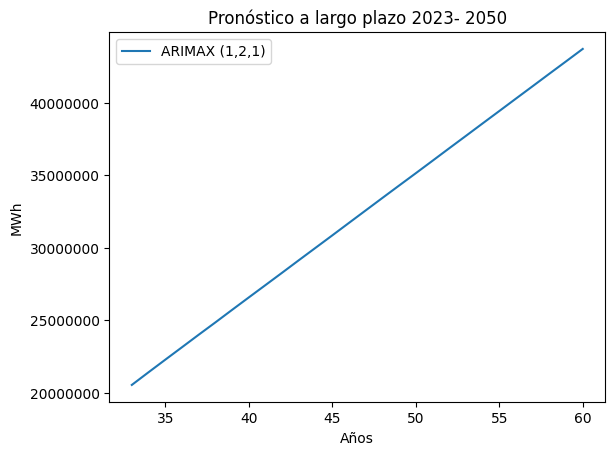

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#GRÁFICO
ax = predictions_2.plot(legend=False)
ax.legend(['ARIMAX (1,2,1)' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a largo plazo 2023- 2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(predictions_2, start=2023):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Años', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_ARIMAX.xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_ARIMAX.xlsx")

Valores de Energía predichos:
2023: 20538022.75
2024: 21410429.49
2025: 22273971.62
2026: 23131979.25
2027: 23993678.93
2028: 24843555.71
2029: 25707220.76
2030: 26563930.67
2031: 27416012.27
2032: 28270402.96
2033: 29131725.92
2034: 29986115.91
2035: 30840505.86
2036: 31701828.62
2037: 32560840.43
2038: 33419852.24
2039: 34274242.17
2040: 35124010.22
2041: 35980711.09
2042: 36842033.84
2043: 37696423.77
2044: 38555435.58
2045: 39409825.51
2046: 40268837.32
2047: 41123227.25
2048: 41982239.06
2049: 42834318.05
2050: 43693329.86


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_arimax = pd.read_excel("/content/Tabla_ARIMAX.xlsx", parse_dates=["Energía"], index_col='Años')

In [ ]:
arimax_series = df_arimax["Energía"]
arimax_series = arimax_series.astype(float)

In [ ]:
print(arimax_series)

Años
2022    1.926162e+07
2023    2.053802e+07
2024    2.141043e+07
2025    2.227397e+07
2026    2.313198e+07
2027    2.399368e+07
2028    2.484356e+07
2029    2.570722e+07
2030    2.656393e+07
2031    2.741601e+07
2032    2.827040e+07
2033    2.913173e+07
2034    2.998612e+07
2035    3.084051e+07
2036    3.170183e+07
2037    3.256084e+07
2038    3.341985e+07
2039    3.427424e+07
2040    3.512401e+07
2041    3.598071e+07
2042    3.684203e+07
2043    3.769642e+07
2044    3.855544e+07
2045    3.940983e+07
2046    4.026884e+07
2047    4.112323e+07
2048    4.198224e+07
2049    4.283432e+07
2050    4.369333e+07
Name: Energía, dtype: float64


In [ ]:
df_ajuste = pd.read_excel("/content/Tabla_ARIMAX_AJUSTE_2.xlsx", parse_dates=["Energía"], index_col='Años')

In [ ]:
arimax_ajuste = df_ajuste["Energía"]
arimax_ajuste = arimax_ajuste.astype(float)

In [ ]:
print(arimax_ajuste)

Años
1990    9.564976e+04
1991    3.631710e+06
1992    2.911504e+06
1993    3.165629e+06
1994    3.616823e+06
1995    4.095422e+06
1996    4.646881e+06
1997    4.944811e+06
1998    5.460655e+06
1999    5.554376e+06
2000    5.916923e+06
2001    6.097540e+06
2002    6.160244e+06
2003    6.373997e+06
2004    6.308665e+06
2005    6.892187e+06
2006    7.470759e+06
2007    8.207632e+06
2008    8.832238e+06
2009    9.428663e+06
2010    1.012239e+07
2011    1.082562e+07
2012    1.174973e+07
2013    1.297804e+07
2014    1.310380e+07
2015    1.427782e+07
2016    1.493069e+07
2017    1.555327e+07
2018    1.628865e+07
2019    1.749149e+07
2020    1.807637e+07
2021    1.865244e+07
2022    1.926162e+07
Name: Energía, dtype: float64


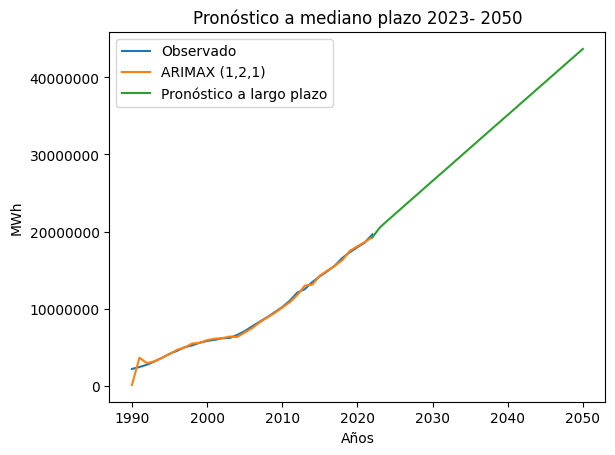

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([data, arimax_ajuste,arimax_series], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Observado', 'ARIMAX (1,2,1)', 'Pronóstico a largo plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

In [ ]:
print(arimax_series)

Años
2022    1.926162e+07
2023    2.053802e+07
2024    2.141043e+07
2025    2.227397e+07
2026    2.313198e+07
2027    2.399368e+07
2028    2.484356e+07
2029    2.570722e+07
2030    2.656393e+07
2031    2.741601e+07
2032    2.827040e+07
2033    2.913173e+07
2034    2.998612e+07
2035    3.084051e+07
2036    3.170183e+07
2037    3.256084e+07
2038    3.341985e+07
2039    3.427424e+07
2040    3.512401e+07
2041    3.598071e+07
2042    3.684203e+07
2043    3.769642e+07
2044    3.855544e+07
2045    3.940983e+07
2046    4.026884e+07
2047    4.112323e+07
2048    4.198224e+07
2049    4.283432e+07
2050    4.369333e+07
Name: Energía, dtype: float64


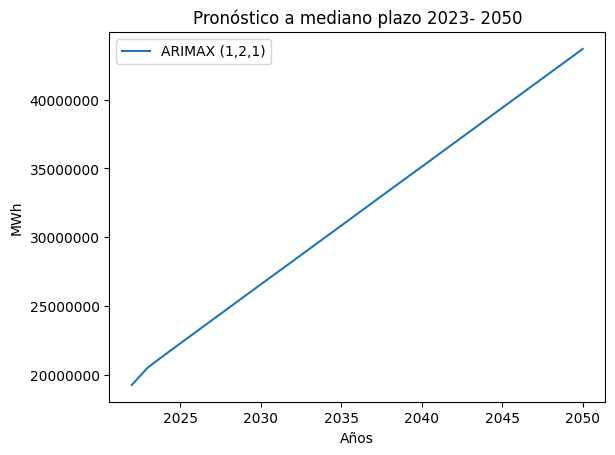

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#GRÁFICO
ax = arimax_series.plot(legend=False)
ax.legend([ 'ARIMAX (1,2,1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

# **ARIMAX (1,2,1) = SARIMAX (1,2,1)(0,0,0,0)**

# **9. HOLT WINTERS DOBLE**


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model= ExponentialSmoothing(data, trend='mul').fit()


In [ ]:
y_pred_13= hw_model.fittedvalues

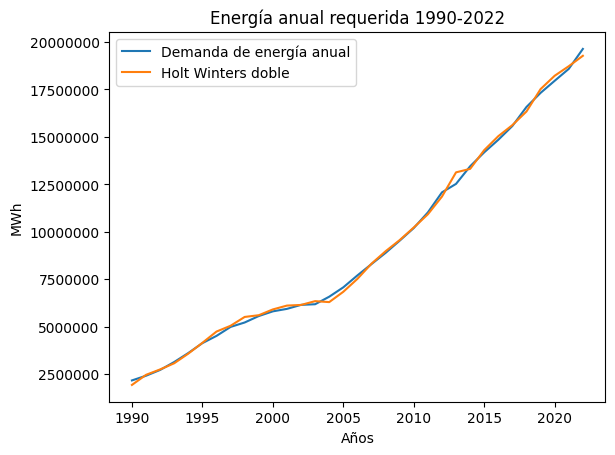

In [ ]:
# Gráfico
ax = data.plot(legend=True, label='Demanda de energía anual')
y_pred_13.plot(ax=ax, label='Holt Winters doble')
ax.set_title('Energía anual requerida 1990-2022')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
ax.legend(loc='best')
warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(y_pred_13, start=1990):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Años', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_ARIMAX_AJUSTE_HW.xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_ARIMAX_AJUSTE_HW.xlsx")

Valores de Energía predichos:
1990: 1931742.86
1991: 2463310.58
1992: 2748170.14
1993: 3072857.46
1994: 3581324.62
1995: 4150341.24
1996: 4742795.56
1997: 5048478.21
1998: 5513257.91
1999: 5604092.93
2000: 5909675.16
2001: 6111883.65
2002: 6145470.31
2003: 6346109.98
2004: 6295011.40
2005: 6839329.17
2006: 7519206.96
2007: 8319433.69
2008: 8975534.88
2009: 9561916.50
2010: 10225492.03
2011: 10921202.10
2012: 11854245.52
2013: 13131697.57
2014: 13315095.30
2015: 14302780.63
2016: 15037576.23
2017: 15621542.34
2018: 16338997.47
2019: 17517927.58
2020: 18220789.37
2021: 18723894.65
2022: 19272397.45


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_ajuste_hw = pd.read_excel("/content/Tabla_ARIMAX_AJUSTE_HW.xlsx", parse_dates=["Energía"], index_col='Años')

In [ ]:
hw_ajuste = df_ajuste["Energía"]
hw_ajuste = hw_ajuste.astype(float)

***9.1 Métricas de error del Holt Winters***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse_13 = np.sqrt(mean_squared_error(data, y_pred_13))
mae_13 = mean_absolute_error(data, y_pred_13)
test_array = data.to_numpy().flatten()
y_pred_13_array = y_pred_13.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_13 = np.mean(np.abs((test_array - y_pred_13_array) / test_array)) * 100
# Cálculo del R^2
r2_13 = r2_score(data, y_pred_13)

print(f'RMSE: {rmse_13:.2f}')
print(f'MAE: {mae_13:.2f}')
print(f'MAPE: {mape_13:.2f}%')
print(f'R^2: {r2_13*100:.2f}%')

RMSE: 196144.79
MAE: 150946.58
MAPE: 2.02%
R^2: 99.86%


In [ ]:
print(hw_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Energía   No. Observations:                   33
Model:             ExponentialSmoothing   SSE                  1269601693285.780
Optimized:                         True   AIC                            812.316
Trend:                   Multiplicative   BIC                            818.302
Seasonal:                          None   AICC                           815.547
Seasonal Periods:                  None   Date:                 Fri, 01 Dec 2023
Box-Cox:                          False   Time:                         03:11:18
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8946548                alpha                 True
smoothing_trend            0.70287

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
residuals = data - hw_model.fittedvalues
sigma = residuals.std()
n = len(data)
ll = -0.5*n*np.log(2*np.pi) - n*np.log(sigma) - 0.5*(residuals**2).sum()/sigma**2

print('Log Verosimilitud:', ll)

Log Verosimilitud: -448.98511846224227


**9.2 Previsión de la Energía Requerida Mensual (2023 -2050)**

In [ ]:
y_pred_13_1 = hw_model.forecast(steps=28)

In [ ]:
print(y_pred_13_1)

33    2.054692e+07
34    2.154347e+07
35    2.258837e+07
36    2.368394e+07
37    2.483265e+07
38    2.603707e+07
39    2.729991e+07
40    2.862400e+07
41    3.001231e+07
42    3.146795e+07
43    3.299420e+07
44    3.459447e+07
45    3.627235e+07
46    3.803162e+07
47    3.987622e+07
48    4.181028e+07
49    4.383814e+07
50    4.596436e+07
51    4.819370e+07
52    5.053117e+07
53    5.298202e+07
54    5.555173e+07
55    5.824608e+07
56    6.107110e+07
57    6.403315e+07
58    6.713886e+07
59    7.039520e+07
60    7.380948e+07
dtype: float64


In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(y_pred_13_1, start=2023):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Años', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_ARIMAX_PREDICT_HW.xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_ARIMAX_PREDICT_HW.xlsx")

Valores de Energía predichos:
2023: 20546915.40
2024: 21543473.44
2025: 22588366.13
2026: 23683937.77
2027: 24832646.38
2028: 26037069.17
2029: 27299908.39
2030: 28623997.32
2031: 30012306.66
2032: 31467951.21
2033: 32994196.84
2034: 34594467.80
2035: 36272354.45
2036: 38031621.26
2037: 39876215.31
2038: 41810275.10
2039: 43838139.86
2040: 45964359.29
2041: 48193703.73
2042: 50531174.92
2043: 52982017.18
2044: 55551729.18
2045: 58246076.30
2046: 61071103.53
2047: 64033149.07
2048: 67138858.53
2049: 70395199.82
2050: 73809478.85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_predict= pd.read_excel("/content/Tabla_ARIMAX_PREDICT_HW.xlsx", parse_dates=["Energía"], index_col='Años')

In [ ]:
hw_predict = df_predict["Energía"]
hw_predict = hw_predict.astype(float)

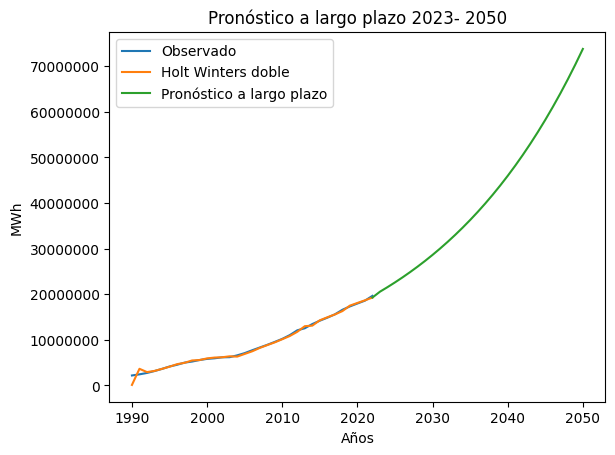

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([data, hw_ajuste, hw_predict], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Observado', 'Holt Winters doble', 'Pronóstico a largo plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a largo plazo 2023- 2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

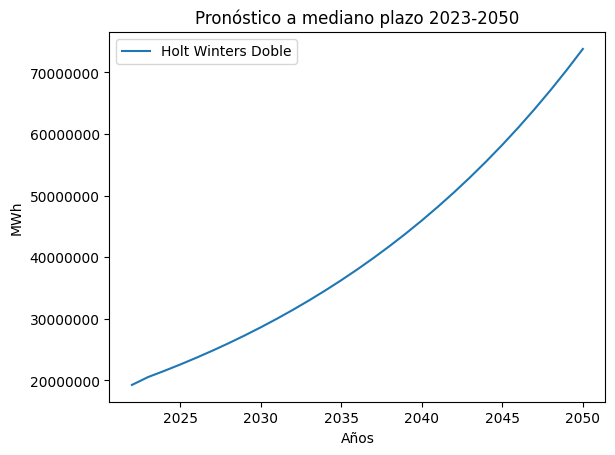

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#GRÁFICO
ax = hw_predict.plot(legend=False)
ax.legend(["Holt Winters Doble"])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023-2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

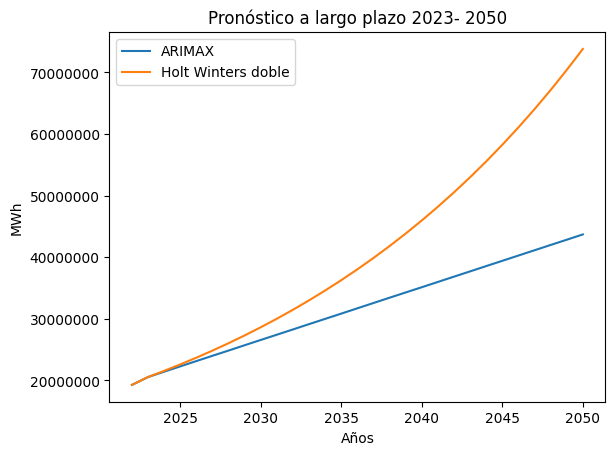

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([arimax_series, hw_predict], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['ARIMAX', 'Holt Winters doble' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a largo plazo 2023- 2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

In [ ]:
residuo_10 = hw_model.resid

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_10)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -3.568518
p-valor: 0.006392
Valores Críticos:
	1%: -3.738
	5%: -2.992
	10%: -2.636


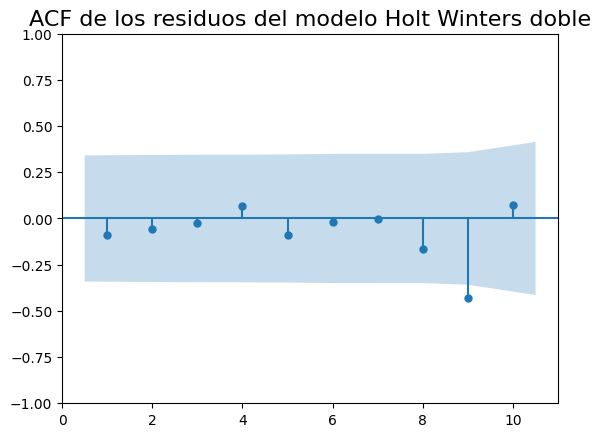

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_10, zero = False, lags = 10)
plt.title("ACF de los residuos del modelo Holt Winters doble", size=16)
plt.show()

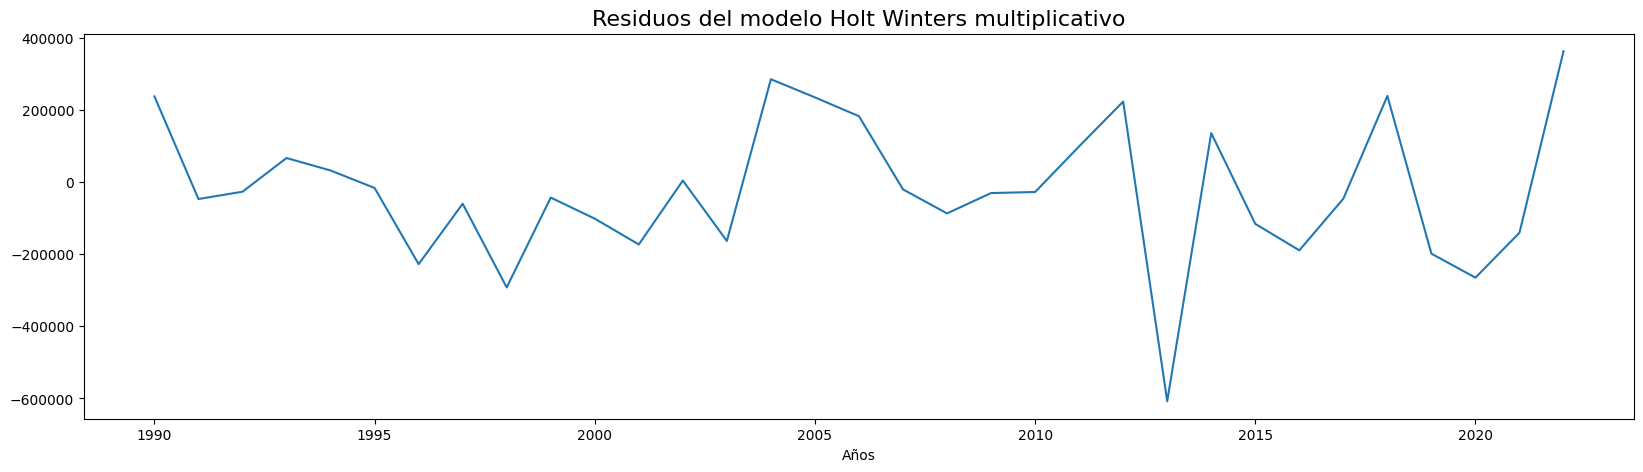

In [ ]:
residuo_10.plot(figsize=(20,5))
plt.title("Residuos del modelo Holt Winters multiplicativo",size=16)
plt.xlabel("Años")
plt.show()

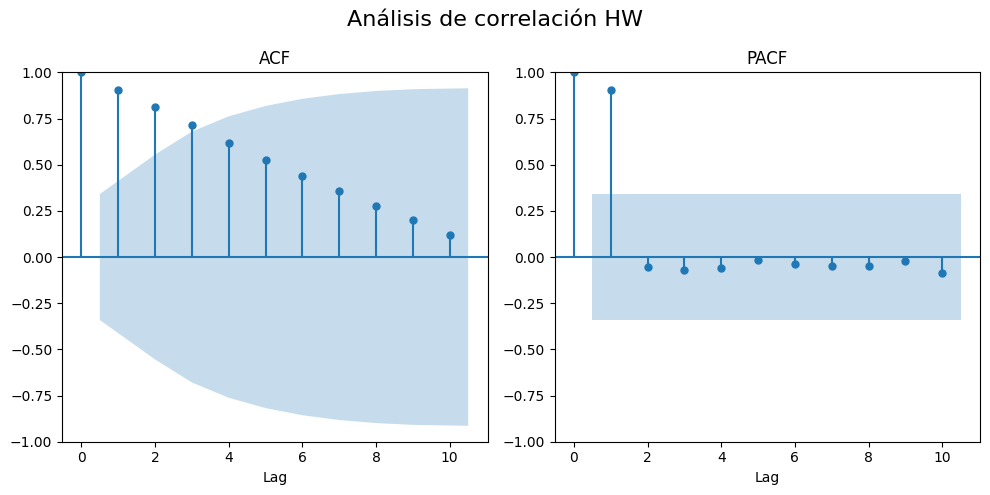

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(y_pred_13, lags=10, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(y_pred_13, lags=10, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación HW', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
import numpy as np
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(y_pred_13)
# Suma de coeficientes ACF significativos
acf_sum = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Número de coeficientes ACF significativos
num_signif = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Promedio ACF primeros 10 lags
acf_mean10 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum)
print('Num Significativos:', num_signif)
print('Promedio 10:', acf_mean10)

Métricas ACF:
Suma: 5.37414872253056
Num Significativos: 8
Promedio 10: 0.4008810322407121


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(y_pred_13)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Número de coeficientes significativos
num_signif = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Promedio PACF primeros 40 lags
pacf_mean10 = np.mean(np.abs(pacf_values[:40]))

print('Métricas PACF:')
print('Suma:', pacf_sum)
print('Número significativos:', num_signif)
print('Promedio 10 lags:', pacf_mean10)

Métricas PACF:
Suma: 1.9351138410948303
Número significativos: 2
Promedio 10 lags: 0.20801022005094583


# **CONCATENAMOS LOS RESULTADOS**

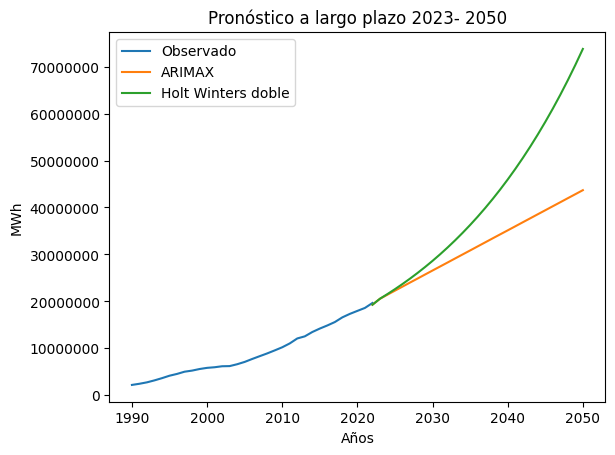

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_con = pd.concat([data,arimax_series, hw_predict], axis=1)
#GRÁFICO
ax = concatenated_df_con.plot(legend=False)
ax.legend(["Observado",'ARIMAX', 'Holt Winters doble' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a largo plazo 2023- 2050')
ax.set_xlabel('Años')
ax.set_ylabel('MWh')
plt.show()

# **#FIN DEL ANÁLISIS A LARGO PLAZO#**